Reading in data, verifying it

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq

In [3]:
ad_young = sc.read_h5ad("/home/timliu/Projects/aging_mice/data/merfish/young_tumour_labeled.h5ad")

In [4]:
ad_aged = sc.read_h5ad("/home/timliu/Projects/aging_mice/data/merfish/aged_tumour_labled.h5ad")

In [5]:
ad_young

AnnData object with n_obs × n_vars = 102305 × 496
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'orig.ident', 'nCount_Vizgen', 'nFeature_Vizgen', 'z', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'seurat_clusters', 'SCT_snn_res.0.3', 'cell_type', 'cancers', 'macrophages'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [6]:
ad_young.obs.head()

,fov,volume,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,...,nFeature_Vizgen,z,nCount_SCT,nFeature_SCT,SCT_snn_res.0.1,seurat_clusters,SCT_snn_res.0.3,cell_type,cancers,macrophages
4656920300001100003,786,416.002636,1164.597387,437.372963,1174.156664,443.085491,1.673469,18,0.610835,6.890080,...,16,3,40,17,0,0,0,Cancer,Cancer,NaN
4656920300001100007,786,1072.988925,1135.670836,450.399724,1145.820604,463.070971,1.249955,62,0.360499,6.951451,...,42,3,61,42,0,0,0,Cancer,Cancer,NaN
4656920300001100008,786,1219.335590,1170.147310,453.567115,1181.739385,467.474836,1.249576,158,0.352357,6.753811,...,66,3,74,40,4,5,5,Endothelial/fibroblasts,immune,NaN
4656920300001100010,786,603.535420,1158.664603,456.596672,1166.480321,466.521316,1.309064,104,0.510236,6.632152,...,62,3,76,59,4,5,5,Endothelial/fibroblasts,immune,NaN
4656920300001100011,786,427.409171,1142.918462,465.128542,1151.653096,472.084317,1.303535,106,0.623767,6.397792,...,62,3,78,60,0,0,0,Cancer,Cancer,NaN


/home/timliu/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


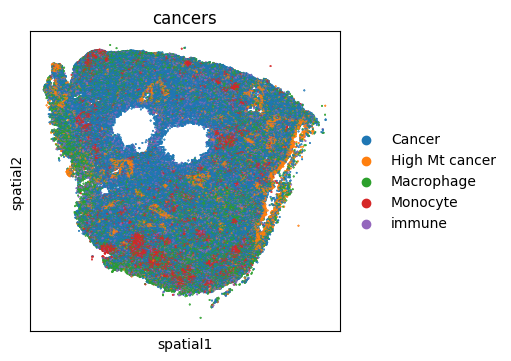

In [7]:
sq.pl.spatial_scatter(
    ad_young, shape=None, color="cancers", size=0.5, library_id="spatial", figsize=(5, 5)
)

Looking at genes of interest:

Ifng

Ifngr1

In [8]:
ad_young.var.loc['Ifng']

n_cells_by_counts        249.000000
mean_counts                0.002009
log1p_mean_counts          0.002007
pct_dropout_by_counts     99.800660
total_counts             251.000000
log1p_total_counts         5.529429
Name: Ifng, dtype: float64

In [9]:
#Convert sparse matrix to dense format
ifng_expression = ad_young[:, 'Ifng'].X.toarray()

# threshold for expression (expression > 0)
cells_expressing_ifng = np.array(ifng_expression > 0).flatten()

ad_young.obs['ifng_expression'] = 'not_expressing'
ad_young.obs.loc[cells_expressing_ifng, 'ifng_expression'] = 'expressing_ifng'

#Convert from string to categorical values
ad_young.obs['ifng_expression'] = pd.Categorical(ad_young.obs['ifng_expression'])

In [10]:
ad_young.obs

,fov,volume,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,...,z,nCount_SCT,nFeature_SCT,SCT_snn_res.0.1,seurat_clusters,SCT_snn_res.0.3,cell_type,cancers,macrophages,ifng_expression
4656920300001100003,786,416.002636,1164.597387,437.372963,1174.156664,443.085491,1.673469,18,0.610835,6.890080,...,3,40,17,0,0,0,Cancer,Cancer,NaN,not_expressing
4656920300001100007,786,1072.988925,1135.670836,450.399724,1145.820604,463.070971,1.249955,62,0.360499,6.951451,...,3,61,42,0,0,0,Cancer,Cancer,NaN,not_expressing
4656920300001100008,786,1219.335590,1170.147310,453.567115,1181.739385,467.474836,1.249576,158,0.352357,6.753811,...,3,74,40,4,5,5,Endothelial/fibroblasts,immune,NaN,not_expressing
4656920300001100010,786,603.535420,1158.664603,456.596672,1166.480321,466.521316,1.309064,104,0.510236,6.632152,...,3,76,59,4,5,5,Endothelial/fibroblasts,immune,NaN,not_expressing
4656920300001100011,786,427.409171,1142.918462,465.128542,1151.653096,472.084317,1.303535,106,0.623767,6.397792,...,3,78,60,0,0,0,Cancer,Cancer,NaN,not_expressing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656920300126200075,468,2400.562754,3694.916209,5035.994760,3714.429484,5053.411459,1.256301,26,0.251937,6.768803,...,3,48,18,7,13,13,Blood vessel,Cancer,NaN,not_expressing
4656920300126200089,468,1416.941014,3612.069750,5125.410087,3628.053455,5137.389389,1.577465,17,0.357571,6.463300,...,3,36,15,4,5,5,Endothelial/fibroblasts,immune,NaN,not_expressing
4656920300126200091,468,1396.793413,3607.879856,5132.289528,3622.452613,5147.252114,1.206449,11,0.334516,6.736147,...,3,36,10,0,0,0,Cancer,Cancer,NaN,not_expressing
4656920300127100015,464,1226.810293,3906.472349,4888.760111,3919.665706,4900.934193,1.155396,21,0.340882,6.843979,...,3,45,22,2,4,4,High Mt cancer,High Mt cancer,NaN,not_expressing


In [11]:
ad_young.var.loc['Ifng']

n_cells_by_counts        249.000000
mean_counts                0.002009
log1p_mean_counts          0.002007
pct_dropout_by_counts     99.800660
total_counts             251.000000
log1p_total_counts         5.529429
Name: Ifng, dtype: float64

In [12]:
pd.crosstab(ad_young.obs['ifng_expression'], ad_young.obs['cell_type'])

cell_type,Blood vessel,Cancer,Endothelial/fibroblasts,High Mt cancer,Macrophage,Monocyte,T cells,Treg?
ifng_expression,,,,,,,,
expressing_ifng,12,103,9,11,33,18,49,5
not_expressing,3519,53533,3152,6603,19632,8745,5041,1840


In [13]:
#Add new category in cell_type for cells that express ifng
ad_young.obs['cell_type'] = ad_young.obs['cell_type'].cat.add_categories(['expressing_ifng'])

#Have cell type for those that express ifng
ad_young.obs.loc[ad_young.obs['ifng_expression'] == 'expressing_ifng', 'cell_type'] = 'expressing_ifng'

In [14]:
#Convert sparse matrix to dense format
ifng_expression = ad_aged[:, 'Ifng'].X.toarray()

# threshold for expression (expression > 0)
cells_expressing_ifng = np.array(ifng_expression > 0).flatten()

ad_aged.obs['ifng_expression'] = 'not_expressing'
ad_aged.obs.loc[cells_expressing_ifng, 'ifng_expression'] = 'expressing_ifng'

#Convert from string to categorical values
ad_aged.obs['ifng_expression'] = pd.Categorical(ad_aged.obs['ifng_expression'])

In [15]:
#Add new category in cell_type for cells that express ifng
ad_aged.obs['cell_type'] = ad_aged.obs['cell_type'].cat.add_categories(['expressing_ifng'])

#Have cell type for those that express ifng
ad_aged.obs.loc[ad_aged.obs['ifng_expression'] == 'expressing_ifng', 'cell_type'] = 'expressing_ifng'

Calculating Co-Occurrence for Young

In [16]:
#Subsample
ad_young_subsample1 = sc.pp.subsample(ad_young, fraction=0.5, copy=True)

In [17]:
#Calculate co-occurrence
sq.gr.co_occurrence(
    ad_young_subsample1,
    cluster_key="cell_type",
)

  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


Text(0.5, 1.0, 'Co-Occurence Young Subsample 1')

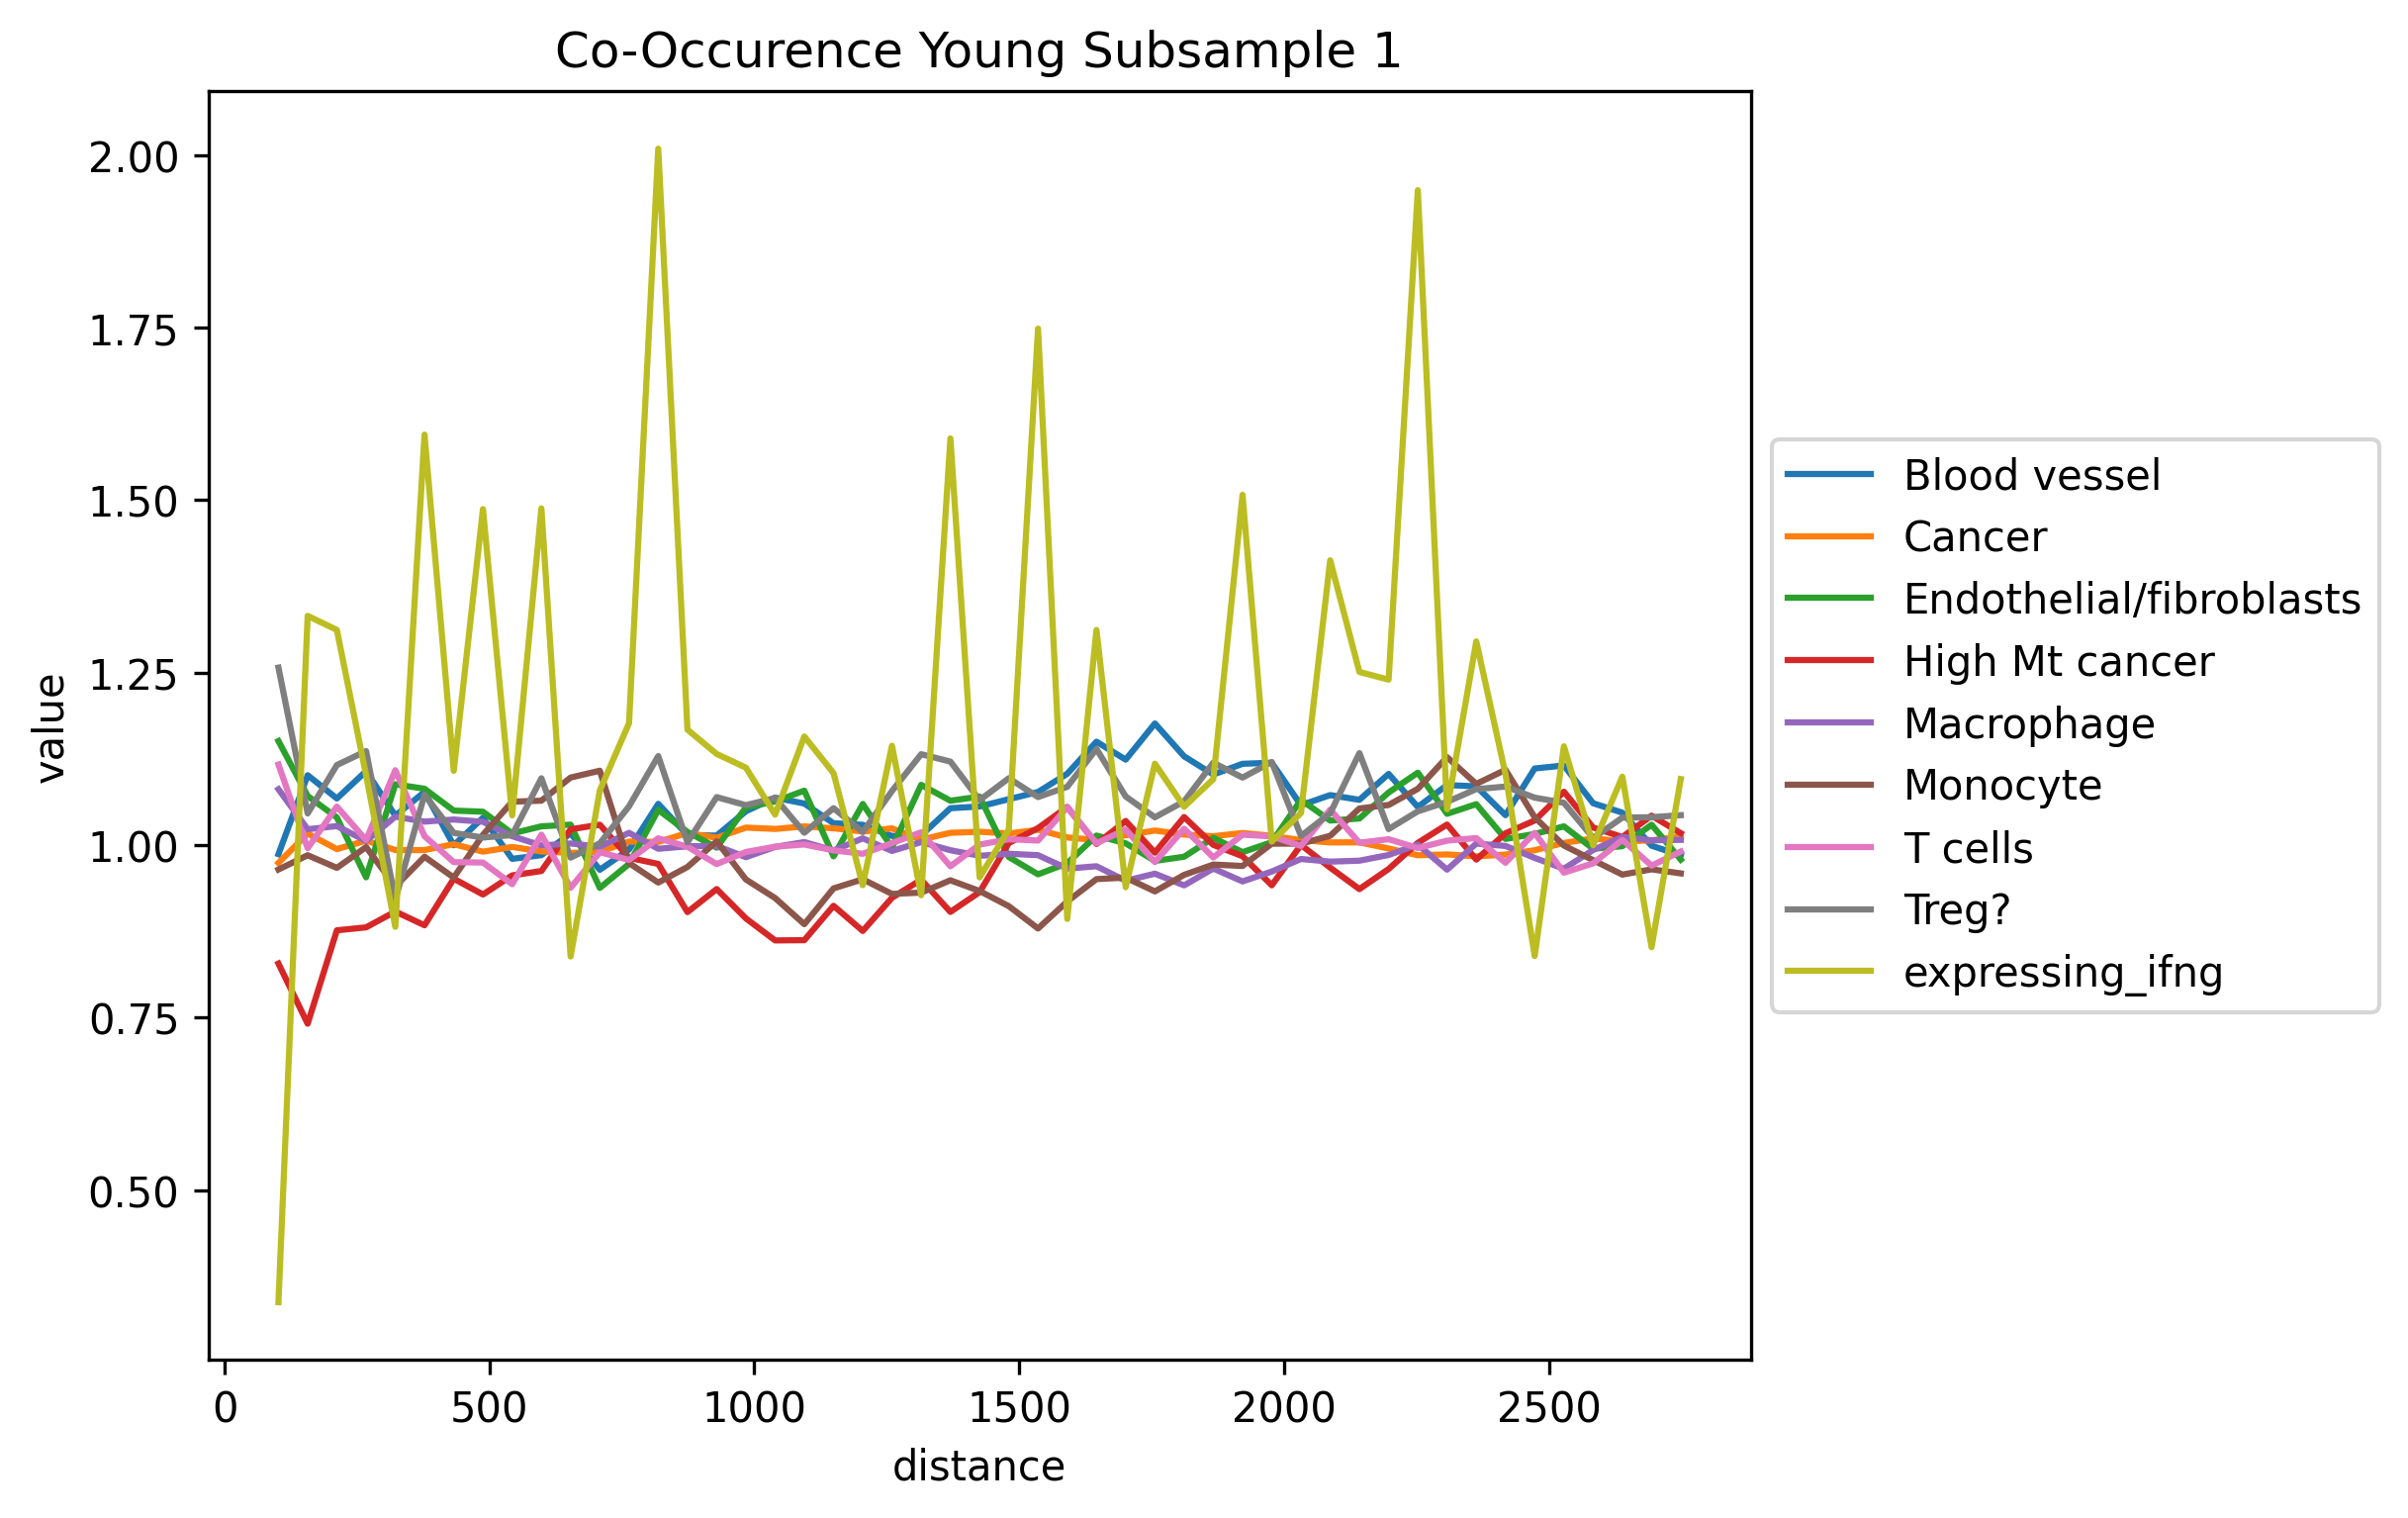

In [23]:
#Plot results

sq.pl.co_occurrence(
    ad_young_subsample1,
    cluster_key="cell_type",
    clusters="expressing_ifng",
    figsize=(8, 5),
    dpi=300,
    save = "/home/timliu/Projects/aging_mice/plots/co_occurrence_young_1.png"
)

plt.title("Co-Occurence Young Subsample 1")

Run it for multiple subsamples of young

In [31]:
#Create 5 subsamples

young_subsamples = []

for i in range(5):
    subsampled_data = sc.pp.subsample(ad_young, fraction=0.7, random_state=i, copy=True)
    young_subsamples.append(subsampled_data)

In [32]:
for i, subsample in enumerate(young_subsamples):
    # Run co-occurrence analysis
    sq.gr.co_occurrence(subsample, cluster_key="cell_type")

    # Create and save co-occurrence plot
    sq.pl.co_occurrence(
        subsample,
        cluster_key="cell_type",
        clusters="expressing_ifng",
        figsize=(8, 5),
        dpi=300
    )
    plt.title(f"Co-Occurrence Young Subsample {i+1}")

    # Save plot
    plt.savefig(f"/home/timliu/Projects/aging_mice/plots/co_occurrence_young_{i+1}.png", dpi=300)

    # Clear plot
    plt.clf()

  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

Calculating Co-Occurrence for Aged

In [33]:
#Create 5 subsamples

aged_subsamples = []

for i in range(5):
    subsampled_data = sc.pp.subsample(ad_aged, fraction=0.7, random_state=i, copy=True)
    aged_subsamples.append(subsampled_data)

In [34]:
for i, subsample in enumerate(aged_subsamples):
    # Run co-occurrence analysis
    sq.gr.co_occurrence(subsample, cluster_key="cell_type")

    # Create and save co-occurrence plot
    sq.pl.co_occurrence(
        subsample,
        cluster_key="cell_type",
        clusters="expressing_ifng",
        figsize=(8, 5),
        dpi=300
    )
    plt.title(f"Co-Occurrence Aged Subsample {i+1}")

    # Save plot
    plt.savefig(f"/home/timliu/Projects/aging_mice/plots/co_occurrence_aged_{i+1}.png", dpi=300)

    # Clear plot
    plt.clf()

  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


  0%|          | 0/1 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>